In [53]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
datos = read_csv('/content/drive/MyDrive/DOCENCIA/22-23/AA/p4/data4.csv', header=None).to_numpy()


In [57]:
print(datos.shape)
print(datos[:10])

(118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]
 [-0.39804   0.034357  1.      ]
 [-0.30588  -0.19225   1.      ]
 [ 0.016705 -0.40424   1.      ]
 [ 0.13191  -0.51389   1.      ]]


In [58]:
X = datos[:, :-1]
Y = datos[:, -1]

print(X.shape)
print(Y.shape)

(118, 2)
(118,)


In [59]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """

    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [60]:
XX = map_feature(X[:, 0], X[:, 1])

print(XX.shape)

npoly = XX.shape[1]


(118, 27)


In [61]:
def sigmoide(x):

    s = 1 / (1 + np.exp(-x))

    return s

In [62]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

In [1]:
def plot_complex_decision_boundary(W, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoide(np.dot(map_feature(u[i], v[j]), W) + b)

    
    # important to transpose z before calling contour       
    z = z.T
    
    # Plot z = 0
    plt.contour(u,v,z, levels = [0.5], colors="g")


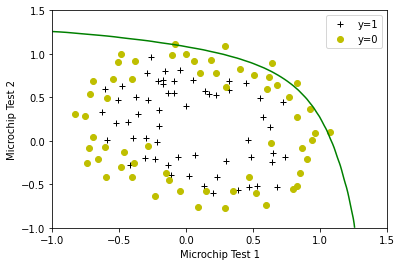

In [52]:
W = np.ones(npoly)
b = -8.0

plot_complex_decision_boundary(W, b, XX, Y)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()